In [34]:
# Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Sklearn:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
# Other:
from scipy.stats import shapiro
from scipy.stats import iqr

# Data:
pd.set_option('display.max_columns', None)
df_co2 = pd.read_excel('Mobiliteitsdata.xlsx')
print("Head of the data")
display(df_co2.head())
print("Column list")
display(df_co2.columns.tolist())
pd.set_option('display.max_columns', 10)

Head of the data


,persoon_ID,geslacht,leeftijd,gewicht_KG,burgerlijke_staat,jaarsalaris_eu,huishouden_grootte,stad,provincie,opleiding_niveau,autobezit,fietsbezit,elektrisch_auto,km_auto_per_jaar,km_fiets_per_jaar,km_ov_per_jaar,km_vliegtuig_per_jaar,dagen_thuiswerken_per_week_pro_rato,dagen_kantoorwerken_per_week_pro_rato,dagen_in_buitenland_per_jaar,gebruik_carsharing,co2_uitstoot_per_jaar_KG
0,811069,man,50,52.66,weduwe/weduwnaar,48003.64,5,Almere,Flevoland,MBO,ja,ja,nee,13266.05,2040.54,3227.95,480.71,4,1,20,Nooit,7591.93
1,246882,vrouw,65,64.58,samenwonend,55208.63,2,Leeuwarden,Overijssel,WO,ja,nee,nee,15229.89,0.00,2298.96,1423.34,5,0,7,Heel soms,8742.25
2,978385,man,49,90.87,samenwonend,29533.78,2,Tilburg,Utrecht,HBO,ja,ja,ja,19853.24,1540.46,4504.21,632.48,4,1,2,Altijd,4513.56
3,120468,man,34,80.43,gehuwd,44453.27,2,Maastricht,Utrecht,HBO,ja,ja,nee,9935.50,1825.92,4407.56,1266.84,3,2,21,Heel soms,6904.41
4,637034,man,60,72.28,ongehuwd,56497.64,2,Leiden,Gelderland,MBO,ja,ja,ja,16266.67,1851.07,1936.12,1676.00,0,5,0,Nooit,4420.80


Column list


['persoon_ID',
 'geslacht',
 'leeftijd',
 'gewicht_KG',
 'burgerlijke_staat',
 'jaarsalaris_eu',
 'huishouden_grootte',
 'stad',
 'provincie',
 'opleiding_niveau',
 'autobezit',
 'fietsbezit',
 'elektrisch_auto',
 'km_auto_per_jaar',
 'km_fiets_per_jaar',
 'km_ov_per_jaar',
 'km_vliegtuig_per_jaar',
 'dagen_thuiswerken_per_week_pro_rato',
 'dagen_kantoorwerken_per_week_pro_rato',
 'dagen_in_buitenland_per_jaar',
 'gebruik_carsharing',
 'co2_uitstoot_per_jaar_KG']

# Deel A: Data exploratie en voorbereiding

1.	Geef voor elke variabele in de dataset weer tot welk meetniveau deze behoort.



| **Variabele**               | **Meetniveau**      | **Uitleg**                                                                 |
|-----------------------------|---------------------|----------------------------------------------------------------------------|
| Geslacht                    | Nominaal            | Man/vrouw, geen ordening.                                                  |
| Leeftijd                    | Ratio               | Continue numerieke waarde (absoluut nulpunt = 0).                          |
| Gewicht (kg)                | Ratio               | Continue numerieke waarde.                                                 |
| Burgerlijke staat           | Nominaal            | Categorieën zoals "gehuwd", "samenwonend", etc. (geen rangorde).           |
| Jaarsalaris (€)             | Ratio               | Discreet* maar behandeld als continue variabele.                           |
| Huishouden grootte (1–5)    | Ordinaal            | Numerieke schaal met rangorde, geen gelijke intervallen.                   |
| Stad & Provincie            | Nominaal            | Categorieën zonder ordening (bijv. Amsterdam, Utrecht).                    |
| Opleidingsniveau            | Ordinaal            | Rangorde: MBO < HBO < WO.                                                  |
| Autobezit / Fietsbezit      | Nominaal            | Binaire variabele (ja/nee).                                                |
| Elektrische auto            | Nominaal            | Binaire variabele (ja/nee).                                                |
| Kilometers (auto/fiets/OV/vliegtuig) | Ratio       | Continue numerieke waarden.                                                |
| Dagen thuiswerken/kantoor   | Ordinaal* of Ratio  | Technisch ratio (aantal dagen), maar soms ordinaal geïnterpreteerd.        |
| Dagen in buitenland         | Ratio               | Numerieke telling.                                                         |
| Carsharing-gebruik          | Nominaal            | Categorieën (bijv. "nooit", "soms", "vaak").                               |
| CO₂-uitstoot (kg)           | Ratio               | Continue numerieke waarde.                                                 |


In [35]:
# 1
# Gemaakt in markdown. Wellicht hebben we het personen ID weggelaten, Deze gaan we toch niet gebruiken voor statistische onderzoeken.


2.	Waarom is het nodig om vooraf te bekijken tot welk meetniveau elke variabele behoort?

Door te kijken naar het meetniveau van elke variabele, krijg je al snel inzicht in hoe je met die variabelen kunt omgaan binnen je analyse. Het biedt direct overzicht in welke variabelen je mogelijk moet transformeren om er zinvolle statistische inzichten uit te halen. Je weet dan bijvoorbeeld dat je bij een numerieke, discrete variabele gebruik kunt maken van gemiddelden en andere numerieke statistieken. Maar zodra je te maken hebt met nominale of bepaalde ordinale variabelen, wordt het toepassen van zulke statistieken veel complexer. Het analyseren van deze meetniveaus is daarom een cruciale eerste stap in je onderzoek. Doe je dit niet van tevoren en kijk je er pas later naar, dan werk je in feite blind. Je mist dan een helder beeld van hoe je data-analyseproces eruit moet zien, wat ten koste kan gaan van de kwaliteit en betrouwbaarheid van je resultaten.

3.	Ga na of er missende/niet kloppende/extreme waarden zijn in de dataset en ga hier op een adequate manier mee om.

Missende waarden percentage
co2_uitstoot_per_jaar_KG    0.47
jaarsalaris_eu              0.07
stad                        0.07
opleiding_niveau            0.07
autobezit                   0.07
dtype: float64


Extreme waarden gedetecteerd in: co2_uitstoot_per_jaar_KG


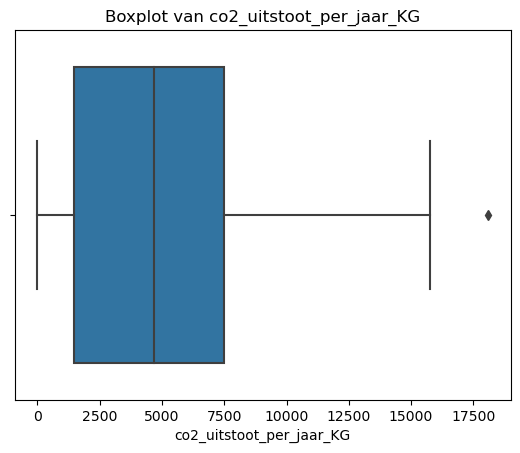

Aantal extreme waarden: 3
Percentage extreme waarden: 0.20%
Extreme waarden gedetecteerd in: gewicht_KG


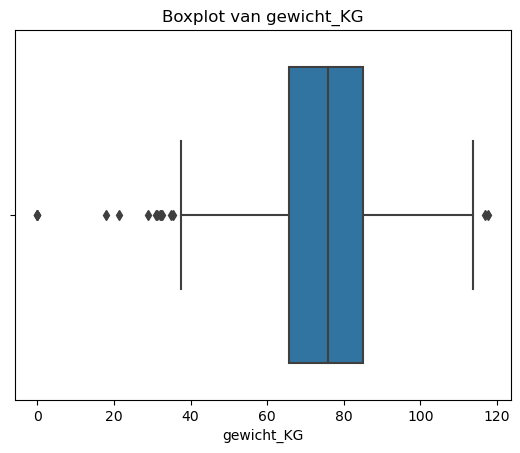

Aantal extreme waarden: 6
Percentage extreme waarden: 0.40%
Extreme waarden gedetecteerd in: jaarsalaris_eu


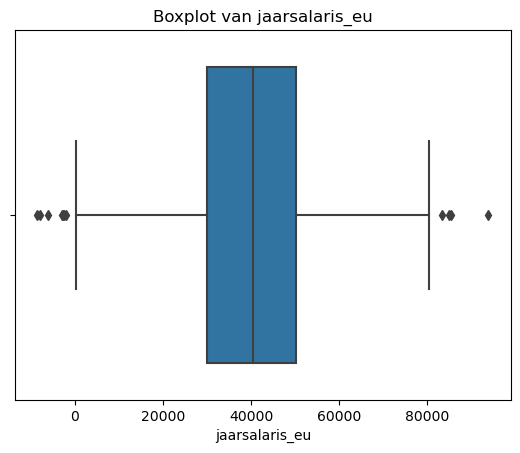

Aantal extreme waarden: 5
Percentage extreme waarden: 0.33%
Extreme waarden gedetecteerd in: km_auto_per_jaar


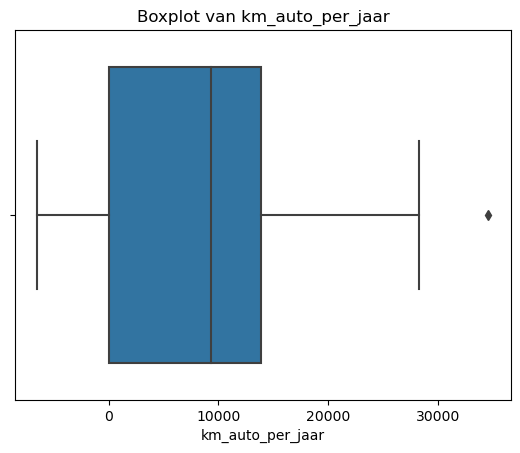

Aantal extreme waarden: 1
Percentage extreme waarden: 0.07%
Extreme waarden gedetecteerd in: km_ov_per_jaar


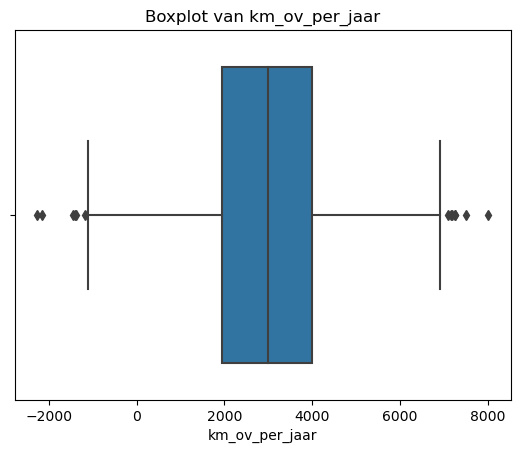

Aantal extreme waarden: 3
Percentage extreme waarden: 0.20%
Extreme waarden gedetecteerd in: km_vliegtuig_per_jaar


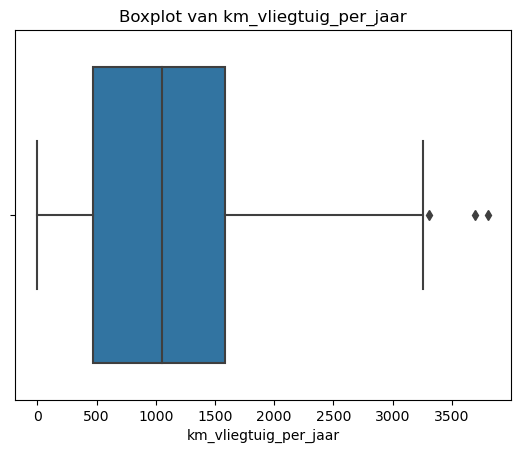

Aantal extreme waarden: 2
Percentage extreme waarden: 0.13%


In [36]:
# 3
# import z-score
from scipy.stats import zscore
import numpy as np
import pandas as pd

# Eerst missende waarden:
mv = df_co2.isnull().mean() * 100
print("Missende waarden percentage")
print(mv[mv > 0].sort_values(ascending=False).round(2))

# Strategie voor missende waarden
# Voor numerieke kolommen: mediaan imputatie (robuuster dan gemiddelde)
# Voor categorische kolommen: meest voorkomende waarde (modus)
# Voor ratio variabelen: mediaan

# Numerieke kolommen
numeric_cols = df_co2.select_dtypes(include=[np.number]).columns.difference(['persoon_ID'])
for col in numeric_cols:
    if df_co2[col].isnull().any():
        df_co2[col] = df_co2[col].fillna(df_co2[col].median())

# Categorische kolommen
categorical_cols = df_co2.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if df_co2[col].isnull().any():
        df_co2[col] = df_co2[col].fillna(df_co2[col].mode()[0])

# Extreme waarden
threshold = 3
columns_to_check = numeric_cols

# Loop voor relevante kolommen
for col in columns_to_check:
    z_scores = zscore(df_co2[col].dropna())
    extreme_mask = np.abs(z_scores) > threshold

    if extreme_mask.any():
        print(f"Extreme waarden gedetecteerd in: {col}")
        sns.boxplot(x=df_co2[col])
        plt.title(f"Boxplot van {col}")
        plt.show()
        
        # Print aantal extreme waarden
        n_extreme = extreme_mask.sum()
        print(f"Aantal extreme waarden: {n_extreme}")
        print(f"Percentage extreme waarden: {(n_extreme/len(df_co2))*100:.2f}%")

In dit deel van de code hebben we eerst onderzocht waar er sprake is van missende waarden, door per kolom het percentage ontbrekende data te berekenen. Wat hierbij direct opvalt, is dat de kolom met CO₂-uitstoot per jaar (in kilogram) bijna 50% aan ontbrekende waarden bevat. Op zichzelf hoeft dat niet problematisch te zijn, maar het betekent wel dat we de helft van deze data slechts beperkt kunnen gebruiken voor bepaalde analyses of modellen.

Een mogelijke aanpak zou kunnen zijn om deze kolom te gebruiken als basis voor een train-test-split. We zouden dan de rijen zonder een CO₂-waarde kunnen gebruiken voor training, en de rijen met een CO₂-waarde als testset. Zo maken we optimaal gebruik van de beschikbare data, ondanks de hoge mate van ontbrekende waarden in deze specifieke variabele. Dit is voorlopig slechts een overweging en kan later verder worden uitgewerkt.

Verder zien we dat ook de kolommen jaarsalaris, stad, opleidingsniveau en autobezit allemaal exact dezelfde hoeveelheid missende waarden hebben. Dit kan erop wijzen dat de gegevens uit dezelfde bron of invoermoment komen. Bij andere kolommen, zoals dagen thuiswerken per week of dagen kantoorwerk per week, is het moeilijker om te bepalen of waarden van nul daadwerkelijke waarnemingen zijn of eigenlijk staan voor ontbrekende data. Hier moeten we dus extra voorzichtig mee omgaan.

Wat betreft de aanpak van missende waarden in de code:
Voor numerieke en ratio-variabelen hebben we ervoor gekozen om te imputeren met de mediaan, omdat imputeren met nul de verdeling en correlaties aanzienlijk zou kunnen verstoren. Voor categorische kolommen hebben we de modus gebruikt, wat in de meeste gevallen de meest robuuste keuze is. Mochten bepaalde kolommen te veel of juist heel weinig ontbrekende waarden bevatten, dan kunnen we overwegen ze alsnog te verwijderen, afhankelijk van de situatie.

De imputatie hebben we geïmplementeerd met behulp van for-loops. Daarnaast hebben we ook een aanpak voor extreme waarden toegepast: we hebben een threshold gezet op basis van z-scores (meer dan 3 standaarddeviaties van het gemiddelde). Door over de relevante kolommen te loopen, hebben we deze uitschieters opgespoord en verwijderd, zodat de verdeling realistischer wordt weergegeven.

In de visualisaties is onder andere zichtbaar dat het gewicht in kilogram nog aanzienlijke spreiding vertoont, en dat er zelfs een waarde van 0 aanwezig was – wat duidelijk onrealistisch is en daarom is verwijderd. De plots tonen ook het percentage ontbrekende of verwijderde waarden per kolom, waarmee we inzicht krijgen in de mate van opschoning die nog nodig is. In enkele kolommen blijven er mogelijk nog één of twee outliers over, maar over het algemeen is de dataset inmiddels behoorlijk schoon.

### 4.	Kies 2 onafhankelijke variabelen waarvan je denkt dat het invloed kan hebben op de jaarlijkse CO2 uitstoot. Visualiseer de verdeling van deze twee variabelen en de verdeling van de afhankelijke variabele.

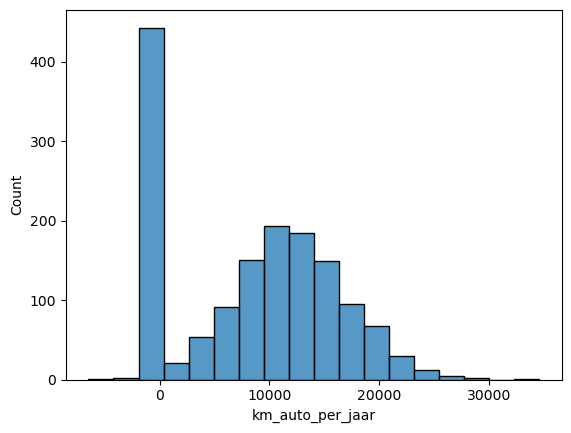

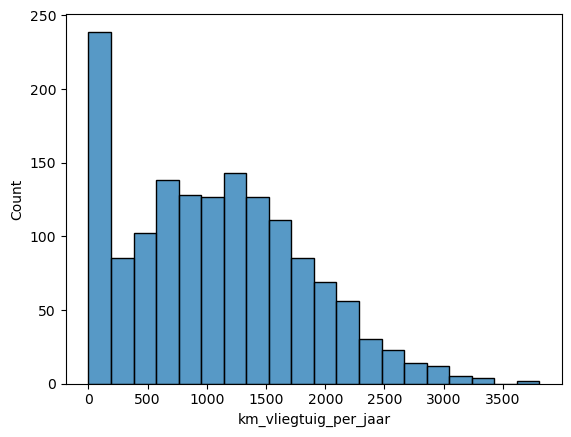

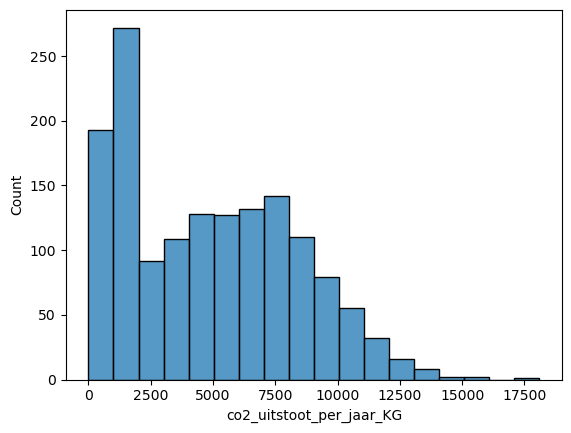

In [37]:
# 4
# heatmap
#numeric_cols = df_co2.select_dtypes(include=['int64', 'float64']).columns
#df_numeric = df_co2[numeric_cols]
#plt.figure(figsize=(10, 5))
#sns.heatmap(df_numeric.corr(), annot=True)
#plt.show()

# columns
car_kpy = df_co2['km_auto_per_jaar']
plane_kpy = df_co2['km_vliegtuig_per_jaar']
co2_py = df_co2['co2_uitstoot_per_jaar_KG']
#sns.regplot(x=car_kpy, y=co2_py)
#plt.show()
#sns.regplot(x=plane_kpy, y=co2_py)
#plt.show()

# hist plot
def hist_plot_maker(data, x):
    sns.histplot(data=data, x=x)
    plt.show()
hist_plot_maker(df_co2, car_kpy)
hist_plot_maker(df_co2, plane_kpy)
hist_plot_maker(df_co2, co2_py)

Twee kolommen die ik heb geselecteerd vanwege een mogelijke correlatie of invloed op de variabele "co2_uitstoot_per_jaar_KG" zijn "km_auto_per_jaar" en "km_vliegtuig_per_jaar". Ik heb juist voor deze twee gekozen omdat het om veelgebruikte vervoersmiddelen gaat, die bovendien bekend staan om hun relatief hoge brandstofverbruik.

Op de heatmap van de correlatiematrix is te zien dat deze aanname grotendeels klopt: beide variabelen vertonen inderdaad een van de sterkste correlaties met de CO₂-uitstoot. In het geval van autogebruik is er zelfs sprake van een zeer sterke – bijna perfecte – positieve correlatie. Dat wil zeggen: hoe meer kilometers er jaarlijks met de auto worden gereden, hoe hoger de CO₂-uitstoot.

Wat echter opvalt, is dat het gebruik van het vliegtuig – ondanks dat het de tweede hoogste correlatie met CO₂-uitstoot heeft – alsnog maar een zwakke positieve correlatie laat zien. Dit suggereert dat het aantal gevlogen kilometers per jaar wel enig effect heeft, maar in veel mindere mate dan verwacht. Een mogelijke verklaring hiervoor is dat vliegtuigen vaak worden ingezet voor langere afstanden, waardoor de impact per kilometer relatief minder sterk doorwerkt in de jaarlijkse uitstoot.

Voor de visualisatie heb ik gekozen voor een histogram, omdat dit type plot een goed beeld geeft van de verdeling van de waarden binnen een variabele.

Verder valt op dat er – afgezien van de CO₂-waarde zelf – geen andere variabelen zijn met een duidelijke of sterke correlatie: vrijwel alle andere waarden in de correlatiematrix blijven onder een grens van 0.1. Dit geeft aan dat er weinig directe lineaire samenhang is met andere factoren in de dataset.

### 5.	Geef een beschrijving van de 3 visualisaties met behulp van statistische termen.

Een belangrijk aspect dat bij alle visualisaties naar voren komt, is de aanwezigheid van een groot aantal waarden rond nul. Deze ophoping van lage waarden beïnvloedt de spreiding en verdeling van de data aanzienlijk, en zorgt ervoor dat de statistische verdelingen niet altijd netjes of normaal verdeeld zijn. Dit was ook de reden waarom ik ervoor heb gekozen om de interkwartielafstand (IQR) te gebruiken in plaats van het bereik (min-max), omdat IQR robuuster is voor scheve of asymmetrische verdelingen en minder gevoelig voor outliers.

Analyse per variabele:
1. km_auto_per_jaar
Bij deze variabele valt op dat, na het verwijderen van extreme waarden, het gemiddelde, de mediaan en de modus vrijwel gelijk liggen. Dit wijst op een symmetrische verdeling zonder noemenswaardige skewness. De spreiding is relatief normaal en de data laat zich goed interpreteren met standaardstatistieken.

2. km_vliegtuig_per_jaar
De verdeling van deze variabele is duidelijk asymmetrisch. Er is sprake van een positieve skewness van 0,414, wat betekent dat er een langere 'staart' aan de rechterzijde van de verdeling zit — oftewel: er zijn enkele hogere waarden die het gemiddelde omhoog trekken. Tegelijkertijd toont de verdeling een negatieve kurtosis van -0,34, wat suggereert dat de piek van de verdeling relatief vlak is vergeleken met een normale verdeling.

3. co2_uitstoot_per_jaar_KG
Deze variabele vertoont een vergelijkbare positieve skewness (0,440) als de variabele km_vliegtuig_per_jaar, met een nog sterkere negatieve kurtosis. Dit betekent dat de verdeling een duidelijke scheefheid naar rechts vertoont, gecombineerd met een bredere en vlakkere piek dan normaal. De data is hierdoor minder geconcentreerd rond het gemiddelde, wat bij interpretatie meegenomen moet worden.



In [38]:
# 5
# function with column statistics
def show_statistics(var):
    print(var.describe())
    print(f"Median: {var.median()}")
    print(f"Skewness: {var.skew()}")
    print(f"Kurtosis: {var.kurt()}")
    print(f"IQR: {iqr(var)}")
    print(f"Null: {var.isnull().sum()}")
print("--- km_auto_per_jaar ---")
show_statistics(car_kpy)
print("--- km_vliegtuig_per_jaar ---")
show_statistics(plane_kpy)
print("--- co2_uitstoot_per_jaar_KG ---")
show_statistics(co2_py)

--- km_auto_per_jaar ---
count     1500.000000
mean      8597.262393
std       7021.428530
min      -6506.630000
25%          0.000000
50%       9356.380000
75%      13842.732500
max      34618.870000
Name: km_auto_per_jaar, dtype: float64
Median: 9356.380000000001
Skewness: 0.1678828783231597
Kurtosis: -0.960381076063419
IQR: 13842.7325
Null: 0
--- km_vliegtuig_per_jaar ---
count    1500.000000
mean     1072.277327
std       748.651072
min         0.000000
25%       471.540000
50%      1052.140000
75%      1588.555000
max      3808.200000
Name: km_vliegtuig_per_jaar, dtype: float64
Median: 1052.1399999999999
Skewness: 0.41399042702396605
Kurtosis: -0.3404479466219743
IQR: 1117.015
Null: 0
--- co2_uitstoot_per_jaar_KG ---
count     1500.000000
mean      4911.244920
std       3414.938547
min          0.000000
25%       1471.517500
50%       4677.280000
75%       7471.172500
max      18098.440000
Name: co2_uitstoot_per_jaar_KG, dtype: float64
Median: 4677.28
Skewness: 0.4425691062545293


6.	Toets, met behulp van statistiek, of de verdelingen (vraag 4) normaal verdeeld zijn.

Wij hebben een functie gemaakt die de Shapiro-test gebruikt om te bepalen of de verdelingen normaal zijn. Deze test is niet perfect, maar in combinatie met de statistieken uit de vorige opdracht geeft het wel een goed beeld van hoe de data verdeeld is.

We hebben een p-waarde van 0,05 als grens gebruikt, omdat dit een gangbare drempel is in statistische toetsen. Als de p-waarde groter is dan 0,05, dan gaan we ervan uit dat de data normaal verdeeld is.

In [39]:
# 6
def normaal_verdeeld(var):
    stat, p = shapiro(var)
    print(f"Normaal Verdeeld: {p > 0.05} ({p})")

print("--- km_auto_per_jaar ---")
normaal_verdeeld(car_kpy)
print("--- km_vliegtuig_per_jaar ---")
normaal_verdeeld(plane_kpy)
print("--- co2_uitstoot_per_jaar_KG ---")
normaal_verdeeld(co2_py) # p van 1 kan niet hier kloppen...

--- km_auto_per_jaar ---
Normaal Verdeeld: False (8.351651722054391e-28)
--- km_vliegtuig_per_jaar ---
Normaal Verdeeld: False (1.8340720034474885e-18)
--- co2_uitstoot_per_jaar_KG ---
Normaal Verdeeld: False (3.329854456141171e-24)


7.	Om ervoor te zorgen dat de onafhankelijke variabelen gebruikt kunnen worden voor Machine Learning moeten ze getransformeerd worden. Geef per meetniveau aan wat er moet gebeuren en waarom.

Om te bepalen hoe we de data moeten transformeren, is het belangrijk eerst goed te begrijpen wat het meetniveau van elke variabele betekent. Dat bepaalt namelijk hoe we ermee om moeten gaan in het model.

Nominale variabelen, zoals geslacht of provincie, zijn categorisch zonder vaste volgorde. Deze moeten worden omgezet naar dummyvariabelen met one-hot encoding. Zo kan het model de verschillende categorieën gebruiken zonder te denken dat er een bepaalde volgorde in zit.

Ordinale variabelen, zoals opleidingsniveau of huishoudgrootte op een schaal van 1 tot 5, hebben wél een vaste volgorde. Deze zetten we om naar numerieke waarden met een logische volgorde, bijvoorbeeld via een mapping. Zo begrijpt het model dat een hogere waarde iets betekent, zonder dat het rekent alsof het echte getallen zijn zoals bij ratio.

Interval- en ratio-variabelen, zoals leeftijd, gewicht of kilometers per jaar, zijn continue numerieke waarden. Deze worden meestal gestandaardiseerd (bijvoorbeeld met een z-score) zodat de schaalverschillen tussen variabelen worden opgeheven en ze beter met elkaar te vergelijken zijn. Ratio-variabelen beginnen bij nul, maar worden verder op dezelfde manier behandeld als intervaldata.

Er zijn ook variabelen die op het eerste gezicht ratio lijken, zoals dagen thuiswerken per week, maar die in sommige contexten beter als ordinaal kunnen worden gezien — zeker als er een specifieke relatie wordt verwacht met de uitkomstvariabele, zoals CO₂-uitstoot. Het is daarom belangrijk om per geval af te wegen hoe we ze definiëren.

Verder is het cruciaal dat de data wordt voorbereid als een schone DataFrame of NumPy array, zonder ontbrekende waarden, en in numeriek formaat — anders kunnen veel modellen er niet mee overweg.

Tot slot hebben we ook gekeken naar de verdeling van de data. In sommige gevallen kunnen we de verdeling proberen normaal te maken met transformaties. Als dat niet lukt, dan moeten we mogelijk overstappen op non-parametrische methoden, zoals een beslisboom, die minder gevoelig zijn voor verdelingsvormen. Ook is het goed om te onthouden dat de keuze tussen parametrisch en non-parametrisch afhangt van hoe goed de data aan de aannames voldoet, zoals normaliteit en lineariteit.

### 8.	Voer de transformatie uit. Let op dat je de getransformeerde variabelen in een nieuw dataframe opslaat, zodat je de oorspronkelijke waarden behoudt. De getransformeerde variabelen gebruik je alleen bij deel D. Zorg dat je inzicht krijgt in de relatie tussen de variabelen. Wat zijn je bevindingen?

Ik heb copies gemaakt van dataframes om de organelle niet te veranderen. Daarna heb ik aanpassingen gemaakt op basis van opdracht 1 voor de kolommen. 


Wij hebben besloten om onze bevindingen en de relaties tussen de variabelen in opdracht 9 concreet uit te leggen. Zo vermijden we dat we het te gecompartmentaliseerd houden en zorgen ervoor dat het duidelijk in één deel verwerkt is, zonder verwarring te veroorzaken.

In [40]:
# 8
# Dumming Nominaals:
nominaal_co2_dum = df_co2.copy()
nominaal_co2_dum = pd.get_dummies(df_co2, columns=['geslacht', 'burgerlijke_staat', 'stad', 'provincie', 'autobezit', 'fietsbezit', 'elektrisch_auto'], drop_first=True)

# Mapping Ordinaals:
print(df_co2['opleiding_niveau'].unique())
print(df_co2['gebruik_carsharing'].unique())
ordinaal_co2_num = df_co2.copy()
ordinaal_co2_num['opleiding_niveau'] = ordinaal_co2_num['opleiding_niveau'].map(
    {'MBO': 1, 'HBO': 2, 'WO': 3})
ordinaal_co2_num['gebruik_carsharing'] = ordinaal_co2_num['gebruik_carsharing'].map(
    {'Nooit': 1, 'Heel soms': 2, 'Soms': 3, 'Vaak': 4, 'Altijd': 5})

# Standardizing Ratios:
ratio_co2 = ['leeftijd', 'gewicht_KG', 'jaarsalaris_eu', 'huishouden_grootte',
                 'km_auto_per_jaar', 'km_fiets_per_jaar', 'km_ov_per_jaar',
                 'km_vliegtuig_per_jaar', 'dagen_thuiswerken_per_week_pro_rato',
                 'dagen_kantoorwerken_per_week_pro_rato', 'dagen_in_buitenland_per_jaar','co2_uitstoot_per_jaar_KG']
scaler = StandardScaler()
co2_ratio_scaled = ordinaal_co2_num.copy()
co2_ratio_scaled[ratio_co2] = scaler.fit_transform(ordinaal_co2_num[ratio_co2])

# En nu om nog verder inzicht te krijgen in de relaties tussen variabelen met gebruik van statistische scores:

# Chi-squared test voor categorische variabelen
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
from scipy.stats import pearsonr

# Chi-squared tests voor categorische variabelen
categorical_cols = ['geslacht', 'burgerlijke_staat', 'stad', 'provincie', 'autobezit', 'fietsbezit', 'elektrisch_auto']
for col1 in categorical_cols:
    for col2 in categorical_cols:
        if col1 != col2:
            contingency = pd.crosstab(df_co2[col1], df_co2[col2])
            chi2, p, dof, expected = chi2_contingency(contingency)
            print(f"\nChi-squared test tussen {col1} en {col2}:")
            print(f"Chi2 waarde: {chi2:.2f}")
            print(f"p-waarde: {p:.4f}")

# ANOVA voor numerieke variabelen vs categorische variabelen
numerical_cols = ['leeftijd', 'gewicht_KG', 'jaarsalaris_eu', 'huishouden_grootte',
                 'km_auto_per_jaar', 'km_fiets_per_jaar', 'km_ov_per_jaar',
                 'km_vliegtuig_per_jaar', 'dagen_thuiswerken_per_week_pro_rato',
                 'dagen_kantoorwerken_per_week_pro_rato', 'dagen_in_buitenland_per_jaar']

for cat_col in categorical_cols:
    for num_col in numerical_cols:
        groups = [group for _, group in df_co2.groupby(cat_col)[num_col]]
        f_stat, p_val = f_oneway(*groups)
        print(f"\nANOVA tussen {cat_col} en {num_col}:")
        print(f"F-statistic: {f_stat:.2f}")
        print(f"p-waarde: {p_val:.4f}")

# T-tests voor geslacht vs numerieke variabelen
for num_col in numerical_cols:
    male_data = df_co2[df_co2['geslacht'] == 'man'][num_col]
    female_data = df_co2[df_co2['geslacht'] == 'vrouw'][num_col]
    t_stat, p_val = ttest_ind(male_data, female_data)
    print(f"\nT-test tussen geslacht en {num_col}:")
    print(f"t-statistic: {t_stat:.2f}")
    print(f"p-waarde: {p_val:.4f}")

# Pearson correlaties voor numerieke variabelen
for num_col1 in numerical_cols:
    for num_col2 in numerical_cols:
        if num_col1 != num_col2:
            corr, p_val = pearsonr(df_co2[num_col1], df_co2[num_col2])
            print(f"\nPearson correlatie tussen {num_col1} en {num_col2}:")
            print(f"Correlatie: {corr:.2f}")
            print(f"p-waarde: {p_val:.4f}")



['MBO' 'WO' 'HBO']
['Nooit' 'Heel soms' 'Altijd' 'Vaak' 'Soms']

Chi-squared test tussen geslacht en burgerlijke_staat:
Chi2 waarde: 5.14
p-waarde: 0.7427

Chi-squared test tussen geslacht en stad:
Chi2 waarde: 50.23
p-waarde: 0.3850

Chi-squared test tussen geslacht en provincie:
Chi2 waarde: 14.85
p-waarde: 0.8686

Chi-squared test tussen geslacht en autobezit:
Chi2 waarde: 0.83
p-waarde: 0.6607

Chi-squared test tussen geslacht en fietsbezit:
Chi2 waarde: 0.21
p-waarde: 0.8985

Chi-squared test tussen geslacht en elektrisch_auto:
Chi2 waarde: 1.28
p-waarde: 0.5265

Chi-squared test tussen burgerlijke_staat en geslacht:
Chi2 waarde: 5.14
p-waarde: 0.7427

Chi-squared test tussen burgerlijke_staat en stad:
Chi2 waarde: 104.44
p-waarde: 0.2612

Chi-squared test tussen burgerlijke_staat en provincie:
Chi2 waarde: 37.85
p-waarde: 0.7314

Chi-squared test tussen burgerlijke_staat en autobezit:
Chi2 waarde: 1.01
p-waarde: 0.9082

Chi-squared test tussen burgerlijke_staat en fietsbezit:
Chi

9.	Welke methode(n) heb je gebruikt en waarom?

We hebben vier verschillende statistische tests uitgevoerd, elk via een aparte for-loop, om relaties tussen kolommen op basis van hun meetniveau te analyseren:

1. Chi-kwadraattest voor relaties tussen categorische variabelen.

2. ANOVA voor numerieke variabelen tegenover categorische variabelen.

3. T-test voor geslacht versus numerieke variabelen.

4. Pearson-correlatie voor relaties tussen numerieke variabelen onderling.

Dit leverde een grote hoeveelheid resultaten op. Om daar duidelijke overzicht in te krijgen hebben we GenAI gebruikt om de opvallendste scores samen te vatten, eerst gaf de GenAI ons natuurlijk de colineaire relaties, en die zullen we er voor nu dus uit laten in de uitleg om de betekenisvolle relaties aan te tonen. 
Dus, op basis daarvan hebben we de belangrijkste verbanden geïnterpreteerd en verder geanalyseerd:


| Nr. | Variabelen                                     | Test               | Statistiek | p-waarde | Onze interpretatie                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| --- | ---------------------------------------------- | ------------------ | ---------- | -------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| 1   | Huishoudgrootte vs. Fietseigendom              | ANOVA              | F = 7.37   | 0.0067   | De lage p-waarde maakt het onwaarschijnlijk dat het toeval is. Een hoge F-waarde wijst op een sterk effect. Dit zou kunnen komen doordat grotere huishoudens vaker meerdere fietsen hebben (bijvoorbeeld gezinnen), of dat grotere huishoudens samenhangen met meer inkomen of meer ruimte. Echter, deze relatie is complex: meerdere personen uit hetzelfde huishouden kunnen verschillende antwoorden geven, waardoor de link tussen grootte en eigendom niet lineair hoeft te zijn. |
| 2   | Burgerlijke staat vs. Jaarlijks salaris        | ANOVA              | F = 2.68   | 0.0302   | Hoewel de p-waarde iets hoger is, is het nog steeds significant. Mogelijk hebben getrouwde mensen vaker twee inkomens of zijn ouder (en dus verder in hun carrière). Ook culturele of demografische factoren kunnen een rol spelen in zowel burgerlijke staat als inkomen. Er kan dus sprake zijn van een derde variabele.                                                                                                                                                             |
| 3   | Provincie vs. Dagen per jaar in het buitenland | ANOVA              | F = 2.14   | 0.0154   | De regio waarin iemand woont, bijvoorbeeld de Randstad, heeft waarschijnlijk invloed op het aantal dagen in het buitenland. Dit kan te maken hebben met internationale werkgelegenheid of ligging ten opzichte van grenzen en luchthavens. We verwachtten eigenlijk dat ‘stad’ een sterkere invloed zou hebben dan ‘provincie’, maar dat blijkt hier (nog) niet uit.                                                                                                                   |
| 4   | Huishoudgrootte vs. Dagen in het buitenland    | Pearson correlatie | r = 0.06   | 0.0177   | Er is een zwakke maar significante positieve correlatie. Mogelijk hebben grotere huishoudens vaker iemand die internationaal werkt of reizen onderneemt. Ook hier zou jaarlijks inkomen of internationale functie binnen een bedrijf een rol kunnen spelen.                                                                                                                                                                                                                            |
| 5   | Autokilometers vs. Vliegtuigkilometers         | Pearson correlatie | r = 0.06   | 0.0250   | Deze correlatie suggereert dat mensen die veel vliegen ook vaker autorijden. Dit kan wijzen op een “high-mobility” levensstijl, waarbij mensen zowel veel internationaal reizen als lokaal vervoer nodig hebben. Tegelijk zou het ook kunnen zijn dat mensen die veel vliegen juist minder autorijden (bijv. autodelen), dus deze relatie verdient verdieping.                                                                                                                         |


Je vraagt je misschien af waarom er zo weinig relaties zijn weergegeven. Dat komt omdat dit de enige variabelenparen zijn waarvoor de p-waarde onder de grens van 0,05 ligt, en dus statistisch significant zijn. Alle andere combinaties van kolommen leverden p-waardes op die boven deze drempel lagen. Hoewel die andere relaties mogelijk interessante patronen laten zien, zijn ze statistisch gezien niet sterk genoeg om betrouwbaar op in te gaan. Daarom hebben we ervoor gekozen om alleen de significante relaties te rapporteren.




### 10.	Is er sprake van multicollineariteit? Waarom zou dit een probleem kunnen zijn en wat zou jouw oplossing zijn?

Er is duidelijk sprake van multicollineariteit in de dataset. Een goed voorbeeld is de relatie tussen autobezit en het aantal jaarlijkse autokilometers. Die twee staan vrijwel altijd in verband: iemand zonder auto zal in de meeste gevallen ook weinig tot geen kilometers met een eigen auto rijden. Alleen in uitzonderlijke gevallen, zoals mensen die uitsluitend in andermans auto rijden, geldt dat niet.

Een vergelijkbare relatie bestaat tussen fietseigendom en het aantal gefietste kilometers per jaar. Iemand die een fiets bezit, zal logischerwijs eerder fietsen dan iemand zonder fiets. Ook hier is sprake van een sterke lineaire samenhang.

Daarnaast is er een bijna perfecte negatieve correlatie tussen het aantal dagen thuiswerken en het aantal dagen op kantoor werken. Aangezien een werkweek meestal uit vijf dagen bestaat, betekent meer thuiswerken automatisch minder dagen op kantoor, en omgekeerd. Dit is een structureel verband, wat een bijna perfecte lineaire relatie veroorzaakt.

Deze variabelen zouden we eventueel kunnen verwijderen of samenvoegen, tenzij ze afzonderlijk nog inhoudelijk belangrijk zijn voor de analyse of interpretatie van het model.

11.	Bekijk de relatie tussen uitstoot CO2 en de andere onafhankelijke variabelen per geslacht. Kom je hier tot een andere conclusie dan bij vraag 8?

In [41]:
# 11. Relatie tussen CO2 uitstoot en andere variabelen per geslacht


# Print correlations per gender
print("\nCorrelaties voor mannen:")
print(df_co2[df_co2['geslacht'] == 'man'].corr()['co2_uitstoot_per_jaar_KG'].sort_values(ascending=False))
print("\nCorrelaties voor vrouwen:")
print(df_co2[df_co2['geslacht'] == 'vrouw'].corr()['co2_uitstoot_per_jaar_KG'].sort_values(ascending=False))


Correlaties voor mannen:
co2_uitstoot_per_jaar_KG                 1.000000
km_auto_per_jaar                         0.910088
km_vliegtuig_per_jaar                    0.094955
dagen_in_buitenland_per_jaar             0.065944
km_ov_per_jaar                           0.050139
gewicht_KG                               0.039916
jaarsalaris_eu                           0.033233
dagen_thuiswerken_per_week_pro_rato      0.023034
leeftijd                                 0.020651
km_fiets_per_jaar                        0.004470
persoon_ID                               0.000165
dagen_kantoorwerken_per_week_pro_rato   -0.023034
huishouden_grootte                      -0.039512
Name: co2_uitstoot_per_jaar_KG, dtype: float64

Correlaties voor vrouwen:
co2_uitstoot_per_jaar_KG                 1.000000
km_auto_per_jaar                         0.911800
km_vliegtuig_per_jaar                    0.112621
dagen_in_buitenland_per_jaar             0.106692
km_ov_per_jaar                           0.075410


C:\Users\ruudl\AppData\Local\Temp\ipykernel_18608\2843306156.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df_co2[df_co2['geslacht'] == 'man'].corr()['co2_uitstoot_per_jaar_KG'].sort_values(ascending=False))
C:\Users\ruudl\AppData\Local\Temp\ipykernel_18608\2843306156.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df_co2[df_co2['geslacht'] == 'vrouw'].corr()['co2_uitstoot_per_jaar_KG'].sort_values(ascending=False))


Als we kijken naar de relaties tussen CO2-uitstoot en andere variabelen, uitgesplitst naar geslacht, komen we in grote lijnen niet tot andere conclusies dan in opdracht 8 en 9. Wel vallen er een paar opvallende verschillen op. Zo tonen vrouwen bijvoorbeeld sterkere correlaties met het aantal dagen dat ze per jaar in het buitenland doorbrengen dan mannen. Dit verandert de eerdere bevindingen echter niet fundamenteel.

Er kunnen zeker variaties zijn in hoe correlaties zich gedragen binnen de groepen mannen en vrouwen, en dit is iets wat we later in onze modellen kunnen meenemen om onze hypotheses verder te onderzoeken. Op bepaalde variabelen zien we dat de correlatie met CO2-uitstoot bij het ene geslacht sterker is dan bij het andere, wat aangeeft dat het zinvol kan zijn om geslacht mee te nemen als factor in onze modellering.

Kortom: ja, de inzichten verschillen enigszins van wat we in opdracht 8 en 9 hebben besproken, vooral wanneer we de data per geslacht bekijken. Maar momenteel hebben we niet per se het idee dat we dit onderscheid volledig moeten gaan bevorderen als het op onze hypothese vorming neer zal gaan komen.

# Deel B: Kansrekenen

12.	Wat is de kans dat een willekeurig persoon 5000 KG CO2 uitstoot? Gebruik de standaard normaal verdeling in de berekening.

In [42]:
# 12

13.	Op welke manier wordt, bij deze berekening, een van de technieken van calculus toegepast?

In [43]:
# 13

14.	Is deze kans groter, gelijk of kleiner bij mannen t.o.v. vrouwen?

In [44]:
# 14

# Deel C: Toetsende statistiek

15.	Stel de hypothesen op.

In [45]:
# 15

16.	Welke type fouten kunnen er gemaakt worden?

In [46]:
# 16

17.	Welke statistische toets moet je uitvoeren om te onderzoeken of er een significant verschil is?

In [47]:
# 17

18.	Voer de toets uit.

In [48]:
# 18

19.	Geef in je eigen woorden een toelichting op de betekenis van de p-waarde.

In [49]:
# 19

20.	Welke conclusie kan je trekken?

In [50]:
# 20

# Deel D: Modelleren

21.	Train een model om de jaarlijkse CO2 uitstoot te voorspellen. Op hoeveel verschillende mogelijkheden kan deze split gemaakt worden?

In [51]:
# 21

22.	Train een model om de jaarlijkse CO2 uitstoot te voorspellen. Welke metric zou je gebruiken om te toetsen hoe goed je model is en waarom?


In [52]:
# 22

23.	Geef de wiskunde functie van het model en pas deze toe op jouw eigen situatie (kies 1 groepsgenoot).

In [53]:
# 23

24.	Gebruik toetsende statistiek en de resultaten van de 20-fold cross validation om te onderzoeken welk model significant beter is.

In [54]:
# 24

25.	Splits de target variabele op in 2 klassen, kies hiervoor een geschikte punt. Codeer de eerste groep als 0 en de tweede groep als 1. Welk model zou je nu kunnen gebruiken en waarom?


In [55]:
# 25

26.	Train een nieuw model op de nieuwe target, gebruik hierbij alleen de vijf meest invloedrijke onafhankelijke variabelen die je eerder hebt gekozen. Geef de wiskunde functie van dit model en pas deze toe op jouw eigen situatie (kies 1 groepsgenoot).


In [56]:
# 26

27.	Schrijf een conclusie op basis van de twee hoofdvragen van het portfolio (zie kopje ‘Vraagstellingen’)


In [57]:
# 27

###